In [5]:
# this version is not optimized

import netCDF4
import xarray as xr
import pandas as pd
import numpy as np

nc = netCDF4.Dataset("sample_data_3.nc", "r", format="NETCDF4")

In [6]:
def getLatIndex(lat):
    max_index = 17999
    min_index = 0
    max_lat = -90
    min_lat = 90

    factor = max_index / (max_lat - min_lat)

    return int((max_index / 2) + factor * lat)


def getLonIndex(lon):
    max_index = 36000
    min_index = 0
    max_lon = 180
    min_lon = -180

    factor = max_index / (max_lon - min_lon)

    return int((max_index / 2) + factor * lon)

In [7]:
lons = nc.variables['lon'][:]
lats = nc.variables['lat'][:]
sst = nc.variables['sea_surface_temperature'][:][:][:]
# convery sst values from Kelvin to Celsius
sst = sst - 273.15

sst_units = nc.variables['sea_surface_temperature'].units

--
kelvin


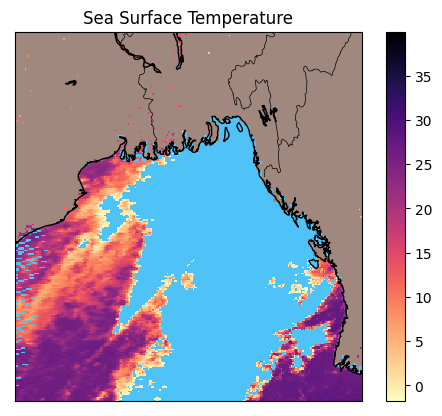

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='merc',llcrnrlon=85.,llcrnrlat=15.,urcrnrlon=95.,urcrnrlat=25.,resolution='i')
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='#A1887F', ocean_color='#4FC3F7')

lons, lats = np.meshgrid(lons, lats)
x, y = map(lons, lats)


map.pcolormesh(x, y, sst[0], cmap=plt.cm.magma_r)

# add colorbar and title besides the plot
plt.colorbar(orientation='vertical')
plt.title('Sea Surface Temperature')

plt.show()